In [1]:
import dataP2 
import regressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
file_path = "CCPP/CCPP/Folds5x2_pp.xlsx"
data = dataP2.readData(file_path)                            
test_set = data[0:1000]                     
training = data[1000:]
n = 5    # 5 fold
cols    = dataP2.comb(['AT','V','AP','RH'])
# divide the training data to the column combinations 
subsets = [training.loc[:,cols[i][k]] for i in range(len(cols)) for k in range(len(cols[i]))]


In [2]:
tr_rms = np.zeros(len(subsets))              # training erms
t_rms  = np.zeros(len(subsets))              # testing error root mean square
v_rms = np.zeros(len(subsets))               # validation error root mean square
valid_std = np.zeros(len(subsets))           # validation standar deviation


In [3]:
for k in range(0,len(subsets)):      
    valid_rms = np.zeros(n)                  
    train_rms = np.zeros(n)                   
    Weights = np.zeros((len(subsets[k].columns)+1,n))    
    tdata = pd.concat([subsets[k], training['PE']], axis=1)  
    
    for i in range(n):                             
        
        train_set, valid_set = dataP2.crossfold(tdata,n,i)         
        
        Xtr = dataP2.getColumn(train_set, subsets[k].columns.tolist())   
        Ytr = dataP2.getColumn(train_set, ['PE'])
        
        Xval = dataP2.getColumn(valid_set,subsets[k].columns.tolist())   
        Yval = dataP2.getColumn(valid_set,['PE'])
        W = regressor.poly_fit(Xtr,Ytr , 1)                                
        
        Weights[:, i] = W.reshape(W.shape[0])
        yval_predicted  = regressor.predict(Xval, W,1)                     
        valid_rms[i] = regressor.error_rms(Yval, yval_predicted.reshape(Yval.shape))  
        ytrain_predicted = regressor.predict(Xtr, W,1)
        train_rms[i]     = regressor.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))

    tr_rms[k] = np.mean(train_rms)
    v_rms[k]  = np.mean(valid_rms)
    valid_std[k] = np.std(valid_rms)
    
    Xtest = dataP2.getColumn(test_set,subsets[k].columns.tolist())
    Ytest = dataP2.getColumn(test_set,['PE'])
    W =  Weights[:, np.argsort(valid_rms)[0]]
    
    ytest_predicted = regressor.predict(Xtest, W,1)
    t_rms[k] =  regressor.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))


Subset  1  :  ['AT']
Subset  2  :  ['V']
Subset  3  :  ['AP']
Subset  4  :  ['RH']
Subset  5  :  ['AT', 'V']
Subset  6  :  ['AT', 'AP']
Subset  7  :  ['AT', 'RH']
Subset  8  :  ['V', 'AP']
Subset  9  :  ['V', 'RH']
Subset  10  :  ['AP', 'RH']
Subset  11  :  ['AT', 'V', 'AP']
Subset  12  :  ['AT', 'V', 'RH']
Subset  13  :  ['AT', 'AP', 'RH']
Subset  14  :  ['V', 'AP', 'RH']
Subset  15  :  ['AT', 'V', 'AP', 'RH']
Best Subset is :  ['AT', 'V', 'AP', 'RH']


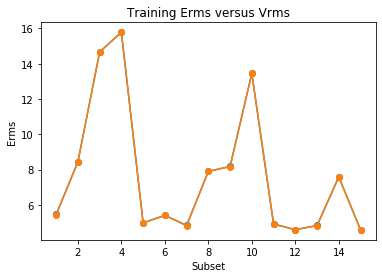

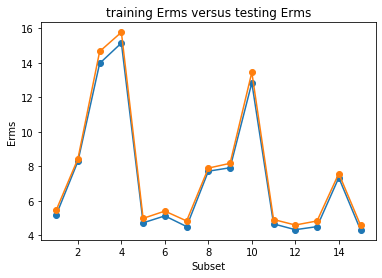

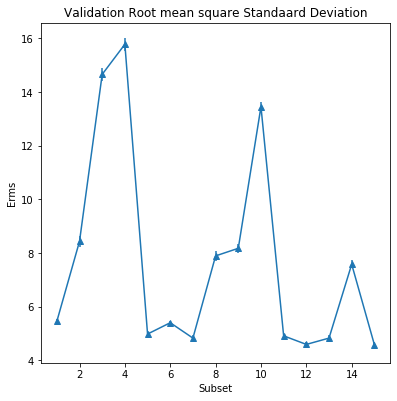

In [7]:
min_indx = np.argsort(v_rms)[0]       

for k in range(len(subsets)):
    print("Subset ", k+1 , " : ", subsets[k].columns.tolist())

print("Best Subset is : "  , subsets[min_indx].columns.tolist())

x  = range(1,len(tr_rms)+1)
plt.figure(0)
plt.title("Training Erms versus Vrms")
plt.xlabel('Subset')
plt.ylabel('Erms')
plt.plot(x,tr_rms,'-o')
plt.plot(x,v_rms, '-o')
plt.show()

plt.figure(1)
plt.title("training Erms versus testing Erms")
plt.xlabel('Subset')
plt.ylabel('Erms')
plt.plot(x,t_rms,'-o')
plt.plot(x,tr_rms, '-o')
plt.show()


x  = range(1,len(v_rms)+1)
plt.figure(figsize=(2*3.13,2*3.13))
plt.title("Validation Root mean square Standaard Deviation")
plt.xlabel("Subset")
plt.ylabel("Erms")
plt.errorbar(x, v_rms, valid_std, marker='^')
plt.show()
